In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from lsst.sims.catalogs.generation.db import CatalogDBObject
from lsst.sims.catalogs.generation.db import CatalogDBObject

In [3]:
import lsst.sims.catUtils.baseCatalogModels as bcm
from lsst.sims.catUtils.baseCatalogModels import GalaxyTileObj
from lsst.sims.catalogs.measures.instance import InstanceCatalog
from lsst.sims.utils import ObservationMetaData



/usr/local/manual/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)
Duplicate object type id 25 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
Duplicate object type id 40 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
Duplicate object type id 40 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
Duplicate object type id 40 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
Duplicate object type id 40 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want

In [4]:
from lsst.sims.catUtils.baseCatalogModels import SNObj

In [5]:
s  = SNObj()

In [6]:
names = s.get_column_names()

/usr/local/manual/anaconda/lib/python2.7/site-packages/sqlalchemy/dialects/mssql/base.py:1294: SAWarning: Did not recognize type 'geography' of column 'geopoint'
  return fn(*arg, **kw)
/usr/local/manual/anaconda/lib/python2.7/site-packages/sqlalchemy/dialects/mssql/base.py:1294: SAWarning: Did not recognize type 'geography' of column 'geocenter'
  return fn(*arg, **kw)
/usr/local/manual/anaconda/lib/python2.7/site-packages/sqlalchemy/dialects/mssql/base.py:1294: SAWarning: Did not recognize type 'geography' of column 'geobox'
  return fn(*arg, **kw)


In [7]:
for key in names:
    if 'snra' in names[key]:
        print key

TwinkSN


In [8]:
print names['TwinkSN']

['galtileid', 'htmid', 'snid', 't0', 'c', 'x1', 'x0', 'redshift', 'snra', 'sndec', 'cx', 'cy', 'cz']


In [9]:
class SNCopy(InstanceCatalog):
    
    column_outputs = ['raJ2000', 'decJ2000', 'snid', 'galtileid','t0', 'x0', 'x1', 'c', 'redshift', ]
    override_formats = {'raJ2000': '%8e', 'decJ2000': '%8e', 'x0':'%8e'}
                        #'x0':'%8e', 'x1':'%8e', 'c':'%8e', 't0':'%8e'}
        
class TSNCopy(InstanceCatalog):
    
    column_outputs = ['raJ2000', 'decJ2000', 'Tsnid', 'Tgaltileid','Tt0', 'Tx0', 'Tx1', 'Tc', 'Tredshift', ]
    override_formats = {'raJ2000': '%8e', 'decJ2000': '%8e', 'x0':'%8e'}



In [10]:
degConv = np.array([1., 1./60., 1./3600.])
raConv = degConv / 24.0 * 360.
centralRA = np.dot(np.array([3., 32., 30]), raConv) #03h 32m 30s
centralDec = np.dot(np.array([-28, 6., 0.]), degConv)
patchRadius = 0.4 * np.sqrt(2) #np.dot(np.array([0.0, 10.0, 0.]), degConv)

In [11]:
TwinklesObsMetaDataSmall = ObservationMetaData(boundType='circle',pointingRA=centralRA,pointingDec=centralDec,
                                          boundLength=0.0015, mjd=60703.0, bandpassName='r', m5=23.)

In [12]:
TwinklesObsMetaDataSmall.bandpass

'r'

In [13]:
#tsmall = SNCopy(db_obj=s, obs_metadata=TwinklesObsMetaDataSmall)

In [14]:
#tsmall.write_catalog('TwinklesSN.dat')

In [15]:
#!wc -l TwinklesSN.dat

In [16]:
#!head TwinklesSN.dat

In [17]:
#Ttsmall = TSNCopy(db_obj=s, obs_metadata=TwinklesObsMetaDataSmall)

In [18]:
#Ttsmall.write_catalog('TTwinklesSN.dat')

In [19]:
#!head TTwinklesSN.dat

In [20]:
from lsst.sims.catUtils.mixins import TwinkSNCat

In [21]:
TwinklesObsMetaDataSmall.bandpass

'r'

In [22]:
sncatalog = TwinkSNCat(db_obj=s, obs_metadata=TwinklesObsMetaDataSmall, 
                         column_outputs=['snra', 'sndec', 'Tsnid', 'Tx0', 'Tt0', 'flux', 'flux_err', 'mag', 'mag_err',
                                         'magNorm', 'sedFilepath'])
sncatalog.writeSedFile = True
sncatalog.prefix = '/Users/rbiswas/tmp/'

('badvalues ', nan)
('mjd ', 60703.0)
('maxTime', 100.0)
('number of cases ', 0)


In [23]:
sncatalog.suppressDimSN 

True

In [24]:
sncatalog.write_catalog('newcat.dat')

('badvalues ', nan)
('mjd ', 60703.0)
('maxTime', 100.0)
('number of cases ', 0)
('badvalues ', nan)
('mjd ', 60703.0)
('maxTime', 100.0)
('number of cases ', 1)


/Users/rbiswas/src/LSST/sims_catutils/python/lsst/sims/catUtils/supernovae/snObject.py:575: RuntimeWarning: divide by zero encountered in log10
  return -2.5 * np.log10(fluxinMaggies)
/Users/rbiswas/src/LSST/sims_photUtils/python/lsst/sims/photUtils/SignalToNoise.py:356: RuntimeWarning: divide by zero encountered in double_scalars
  fluxRatio = m5Flux/sourceFlux
/Users/rbiswas/src/LSST/sims_catutils/python/lsst/sims/catUtils/supernovae/snObject.py:619: RuntimeWarning: invalid value encountered in double_scalars
  return fluxinMaggies / SNR
/Users/rbiswas/src/LSST/sims_photUtils/python/lsst/sims/photUtils/SignalToNoise.py:258: RuntimeWarning: divide by zero encountered in double_scalars
  return 2.5*numpy.log10(1.0+1.0/snr)


In [25]:
!wc -l newcat.dat

       2 newcat.dat


In [26]:
import pandas as pd

In [27]:
df = pd.read_csv('newcat.dat', sep=',\s+')
df.rename(columns={'#snid':'snid'}, inplace=True)

/usr/local/manual/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [28]:
sncatalog.mjdobs

60703.0

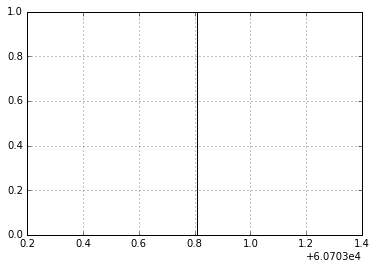

In [29]:
df.t0.hist(bins=4000)

In [30]:
df['DeltaT'] = sncatalog.mjdobs - df['t0']
df['SNR'] = df.flux / df.flux_err
df.head()

,snid,snra,sndec,z,t0,c,x1,x0,Tsnid,Tx0,Tt0,flux,flux_err,mag,mag_err,magNorm,sedFilepath,DeltaT,SNR
0,60003402804,0.927179,-0.486951,0.5344,60703.8076,-0.029109,-0.9233,0.000009,60003402804,0,1123.8076,7.520366e-10,1.262635e-10,22.8094,0.168584,23.3873,/Users/rbiswas/tmp/specFile_60003402804.0_6070...,-0.8076,5.956089


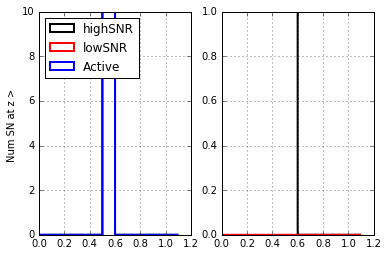

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=2);
_ = ax[0].hist(df.query('SNR > 5.').z, bins=np.arange(0., 1.2, 0.1), histtype='step', lw=2, color='k', normed=True,
               label='highSNR')
_ = ax[0].hist(df.query('SNR < 5. and SNR > 0.').z, bins=np.arange(0., 1.2, 0.1), histtype='step', lw=2, color='r', 
             normed=True, label='lowSNR')
_ = ax[0].hist(df.query('SNR > 0.').z, bins=np.arange(0., 1.2, 0.1), histtype='step', lw=2, color='b', 
             normed=True, label='Active')
ax[0].grid(True)
_ = ax[1].hist(df.query('SNR > 5.').z, bins=np.arange(0., 1.2, 0.1), histtype='step', lw=2, color='k', normed=False, 
               cumulative=-1)
_ = ax[1].hist(df.query('SNR < 5. and SNR > 0.').z, bins=np.arange(0., 1.2, 0.1), histtype='step', lw=2, color='r', 
               normed=False, cumulative=-1)
_ = ax[1].grid(True)
_ = ax[0].legend(loc='upper left')
_ = ax[0].set_ylabel('PDF')
_ = ax[0].set_ylabel('Num SN at z > ')

In [33]:
from lsst.sims.catUtils.exampleCatalogDefinitions.phoSimCatalogExamples import PhoSimCatalogSN

In [34]:
phosimCat = PhoSimCatalogSN(sncatalog)

AttributeError: 'TwinkSNCat' object has no attribute 'getIdColKey'

In [38]:
class PhoSimTwinkles2(TwinkSNCat, PhoSimCatalogSN):
    pass

ValueError: column name 'sedFilepath' in compound getter 'get_phosimVars' conflicts with getter 'get_sedFilepath'